In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt

def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None
print(hidden_size)


#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Chose the right data augmentation transforms with the right        #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='../../datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=False)

test_dataset = torchvision.datasets.CIFAR10(root='../../datasets/',
                                          train=False,
                                          transform=test_transform
                                          )
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)



Using device: cuda
[128, 512, 512, 512, 512, 512]


In [2]:
(images, labels) = next(iter(train_loader))
# Move tensors to the configured device
images = images.to(device)
labels = labels.to(device)

In [22]:
def VisualizeFilter(model):
    #################################################################################
    # TODO: Implement the functiont to visualize the weights in the first conv layer#
    # in the model. Visualize them as a single image fo stacked filters.            #
    # You can use matlplotlib.imshow to visualize an image in python                #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    # import pdb; pdb.set_trace()
    fig = plt.figure(figsize=(10, 7))
    kernels = model.conv_layer[12].weight.data.cpu().numpy()
    for i in range(32*16):
        fig.add_subplot(32, 16, i+1)
        img = kernels[i, ...]
        # print(img.shape)
        img = img - img.min()
        img = img / img.max()
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()
    # print(kernels.shape)

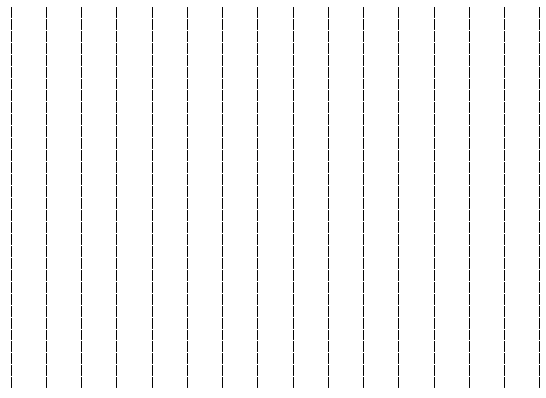

In [23]:
best_model = torch.load('model.ckpt') # torch.load()
model.load_state_dict(best_model)
VisualizeFilter(model)

Using device: cuda
[128, 512, 512, 512, 512, 512]
ConvNet(
  (conv_layer): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU(inplace=True)
    (9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU(inplace=True)
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=F

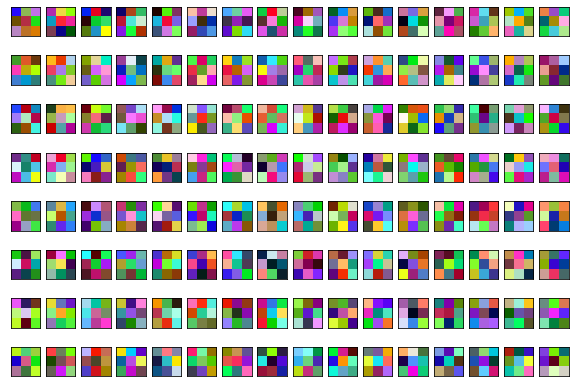

Epoch [1/20], Step [100/245], Loss: 1.7265
Epoch [1/20], Step [200/245], Loss: 1.4357
Validataion accuracy is: 51.5 %
Validataion loss is: 1.3557
Epoch [2/20], Step [100/245], Loss: 1.3123
Epoch [2/20], Step [200/245], Loss: 1.1475
Validataion accuracy is: 58.4 %
Validataion loss is: 1.1374
Epoch [3/20], Step [100/245], Loss: 0.9847
Epoch [3/20], Step [200/245], Loss: 0.8572
Validataion accuracy is: 68.5 %
Validataion loss is: 0.8478
Epoch [4/20], Step [100/245], Loss: 0.9016
Epoch [4/20], Step [200/245], Loss: 0.6986
Validataion accuracy is: 72.0 %
Validataion loss is: 0.8040
Epoch [5/20], Step [100/245], Loss: 0.6280
Epoch [5/20], Step [200/245], Loss: 0.7738
Validataion accuracy is: 72.8 %
Validataion loss is: 0.6963
Epoch [6/20], Step [100/245], Loss: 0.4847
Epoch [6/20], Step [200/245], Loss: 0.7039
Validataion accuracy is: 77.3 %
Validataion loss is: 0.6507
Epoch [7/20], Step [100/245], Loss: 0.5518
Epoch [7/20], Step [200/245], Loss: 0.6633
Validataion accuracy is: 79.1 %
Valida

<Figure size 432x288 with 0 Axes>

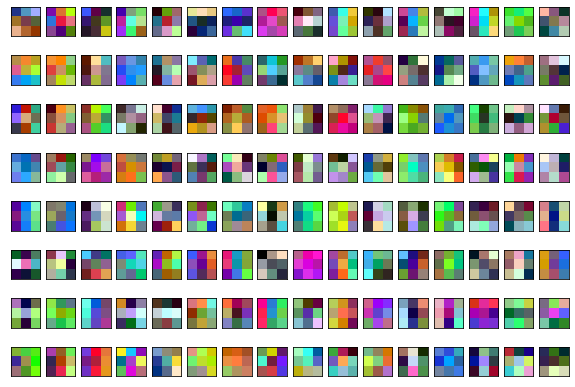

<Figure size 432x288 with 0 Axes>

In [2]:
from ex3_convnet import ConvNet

In [5]:
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)